# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT DSML Files/1- Project Assignment - Food hub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
#Replace "Not given" food ratings with NaN
#NaN allows consistent representation of missing values across this data set
df['rating'].replace('Not given', np.nan, inplace= True)

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Time required to prepare food:
**Min time** = 20 mins ,    **Avg time** = 27 mins , **Max time** = 35 mins


### **Question 5:** How many orders are not rated?

In [ ]:
Not_rated_count = df.isna().sum()
print(Not_rated_count)

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


#### Observations:
Total Not Rated values in the data set = **736**


**For the Puporse of EDA we need to convert rating coulumn from Object to Integer and to perform numerical calculations as well.**

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').astype('Int64')     # to convert rating dtype from object to int64 so we can see the effect of rating in visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: Int64(1), float64(1), int64(4), object(3)
memory usage: 135.4+ KB


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

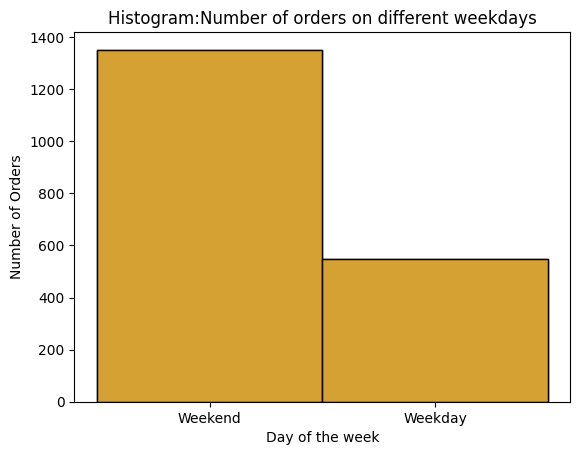

In [ ]:
#TEST 1............
sns.histplot(data=df, x='day_of_the_week')
plt.title('Histogram:Number of orders on different weekdays')
plt.xlabel('Day of the week')
plt.ylabel('Number of Orders')
sns.histplot(data=df, x='day_of_the_week',color='orange');

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

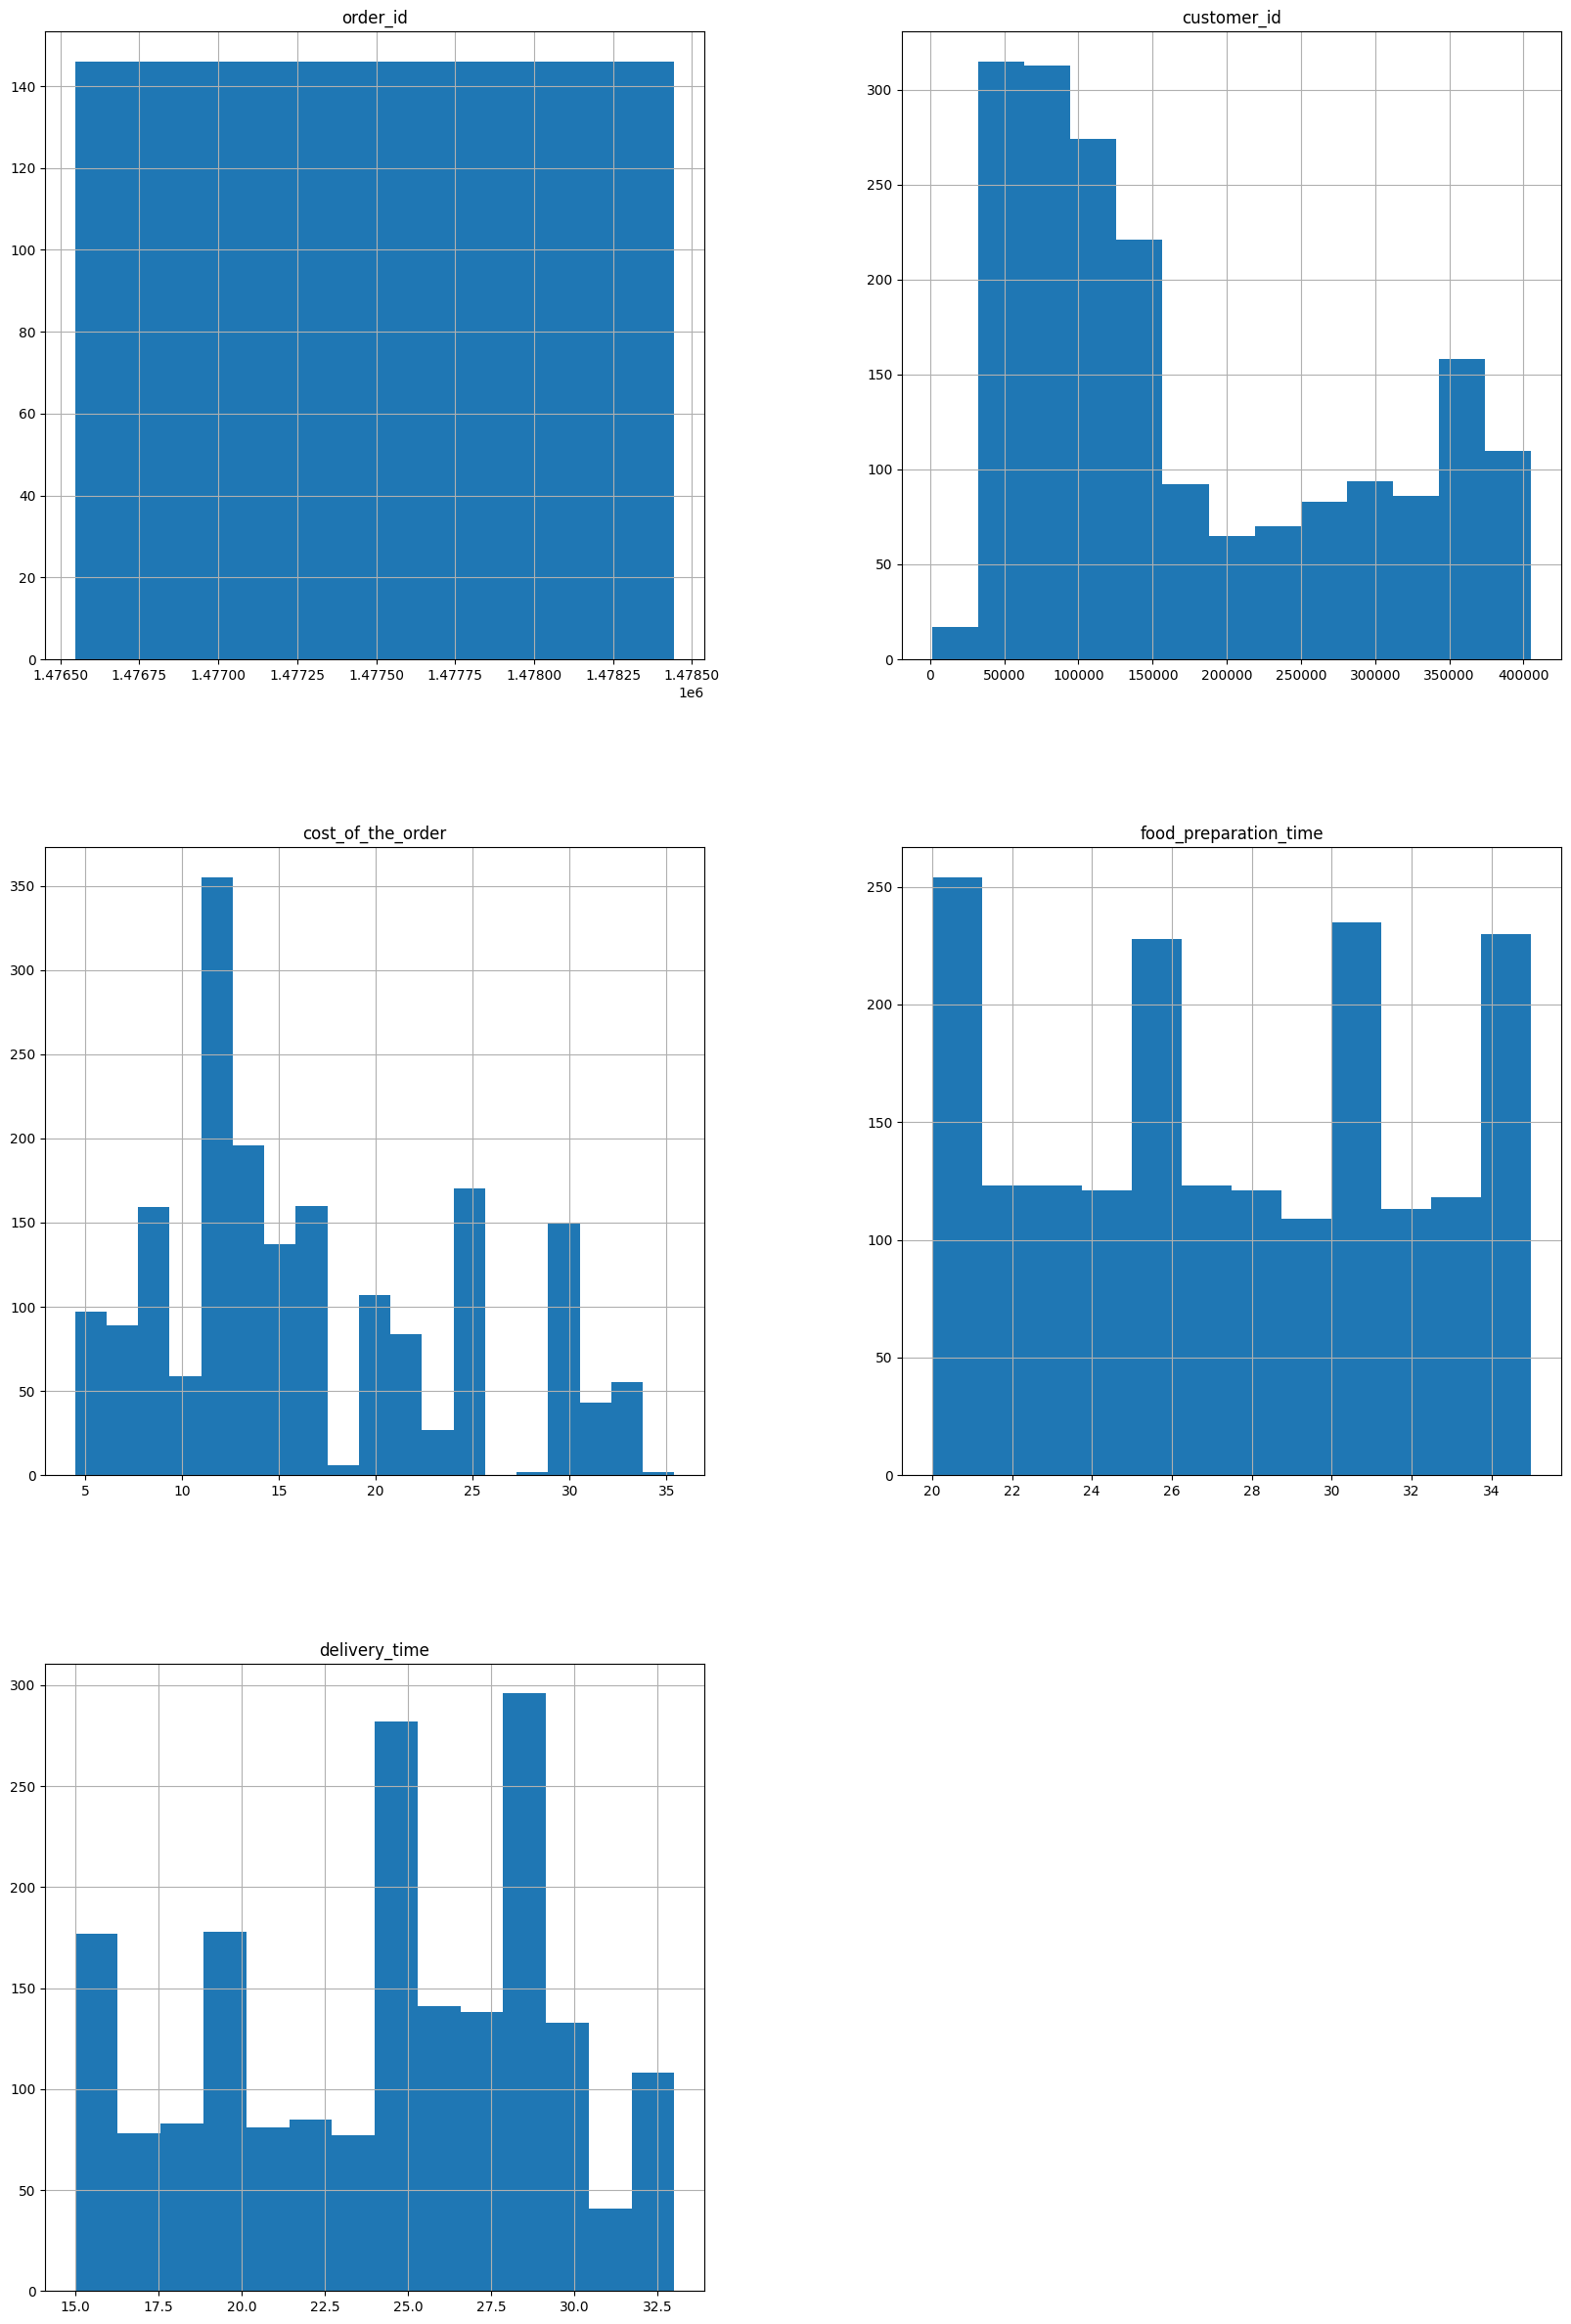

In [ ]:
#TEST 2
df.hist(figsize=(20,30), bins="auto")


Text(0, 0.5, 'number of orders')

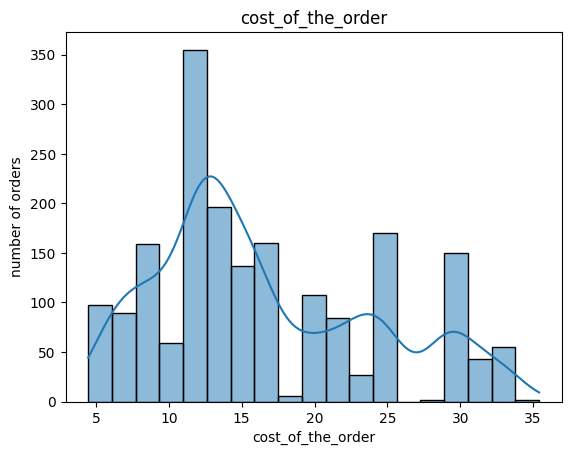

In [ ]:
#test3
sns.histplot(data=df, x='cost_of_the_order', bins =19, kde= True)
plt.title('cost_of_the_order')
plt.xlabel('cost_of_the_order')
plt.ylabel('number of orders')


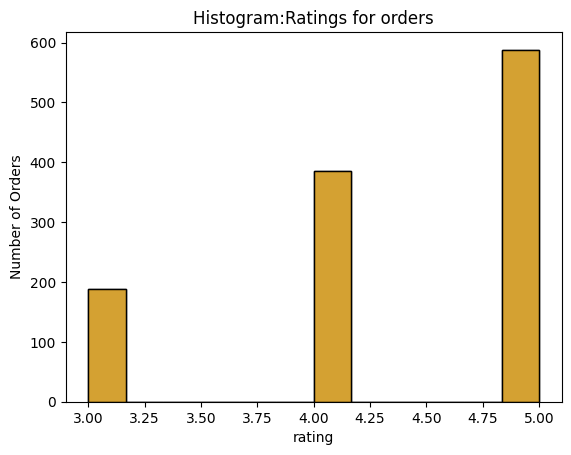

In [ ]:
#TEST 4............
sns.histplot(data=df, x='rating')
plt.title('Histogram:Ratings for orders')
plt.xlabel('rating')
plt.ylabel('Number of Orders')
sns.histplot(data=df, x='rating',color='orange');

<Axes: xlabel='cost_of_the_order'>

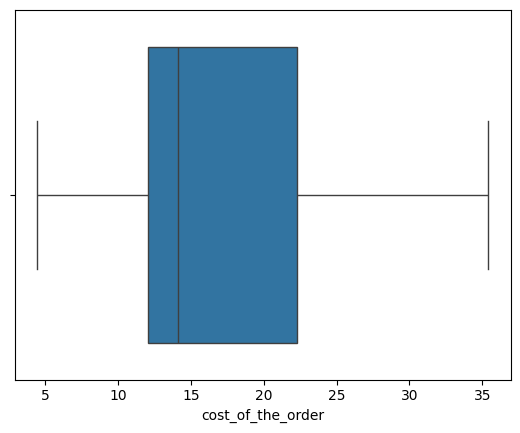

In [ ]:
#Test Box plot 1
sns.boxplot(x="cost_of_the_order", data=df)


<Axes: xlabel='food_preparation_time'>

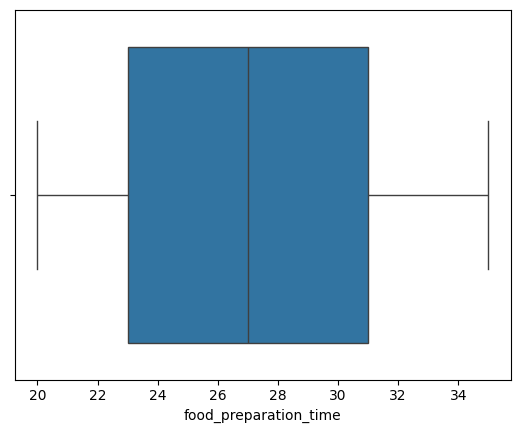

In [ ]:
#Test Box plot 2
sns.boxplot(x="food_preparation_time", data=df)


<Axes: xlabel='delivery_time'>

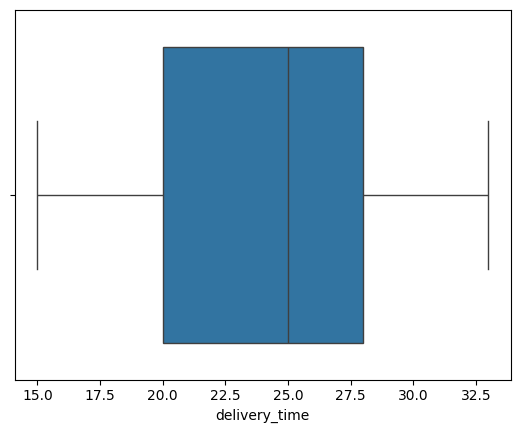

In [ ]:
#Test Box plot 3
sns.boxplot(x="delivery_time", data=df)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

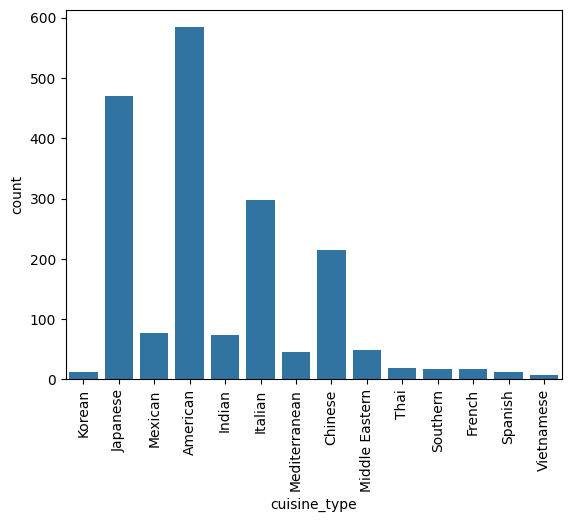

In [ ]:
#Lets explore categorical variables
#TEST
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)

**order_id** and **customer_id** is a categorical data that represent unique indentifiers (ID),
to dinstinguish between individual customers and track different orders. Hence we cannot draw any insights from these variables.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
All_restaurants = df.groupby('restaurant_name')     # groupby command groups data by column to perform variety of aggregation functions
order_counts= All_restaurants['order_id'].count()   # count the number of row wise entries against previously specified group
Top_restaurants= order_counts.nlargest(5)           # display the highest 5 Values
print(Top_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


**Observations:** Shake Shack is the most popular restaurant , with The Meatball shop is the second most popular restaurant. Then comes Blue Ribbon Sushi, Blue Ribbon Fried Chicken and at the fifth position Parm.


### **Question 8**: Which is the most popular cuisine on weekends?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

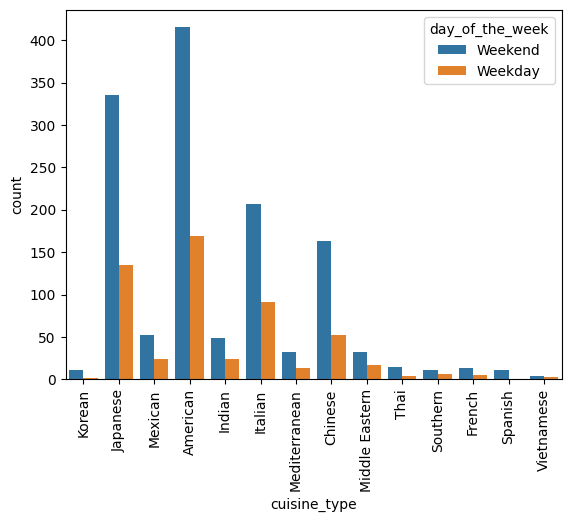

In [ ]:
sns.countplot(data=df, x='cuisine_type', hue = "day_of_the_week")   #hue is used to add another seggregation in data based on the day of the week represented by a different colour
plt.xticks(rotation=90)

#### Observations: American cuisine type is a popular choice on weekends. Second popular is Japanese Food.


### **Question 9**: What percentage of the orders cost more than 20 dollars?







In [ ]:
Cost_higher_than_20 = (df['cost_of_the_order'] > 20).sum()            #Sum of all entries columnwise with values greater than 20
Total_orders =len(df)                                                 #Total length of data set
Percentage_orders_over_20=(Cost_higher_than_20/Total_orders)*100
print("Percentage_orders_over_20:",Percentage_orders_over_20)


Percentage_orders_over_20: 29.24130663856691


#### Observations:
The percentage of orders with a value higher than 20 is 29.241%

### **Question 10**: What is the mean order delivery time?

In [ ]:
Mean_deliverytime= df['delivery_time'].mean()
print(Mean_deliverytime)

24.161749209694417


#### Observations:
The mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
Customer_profile = df.groupby('customer_id')          # groupby command groups data by column to perform variety of aggregation functions
order_counts= Customer_profile['order_id'].count()    # count the number of row wise entries against previously specified groups
Top_customers= order_counts.nlargest(3)               # display the highest 5 Values
print(Top_customers)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
**customer_ids**: Number of orders placed

1.   **52832** : 13
2.   **47440** : 10
3.   **83287** : 9






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

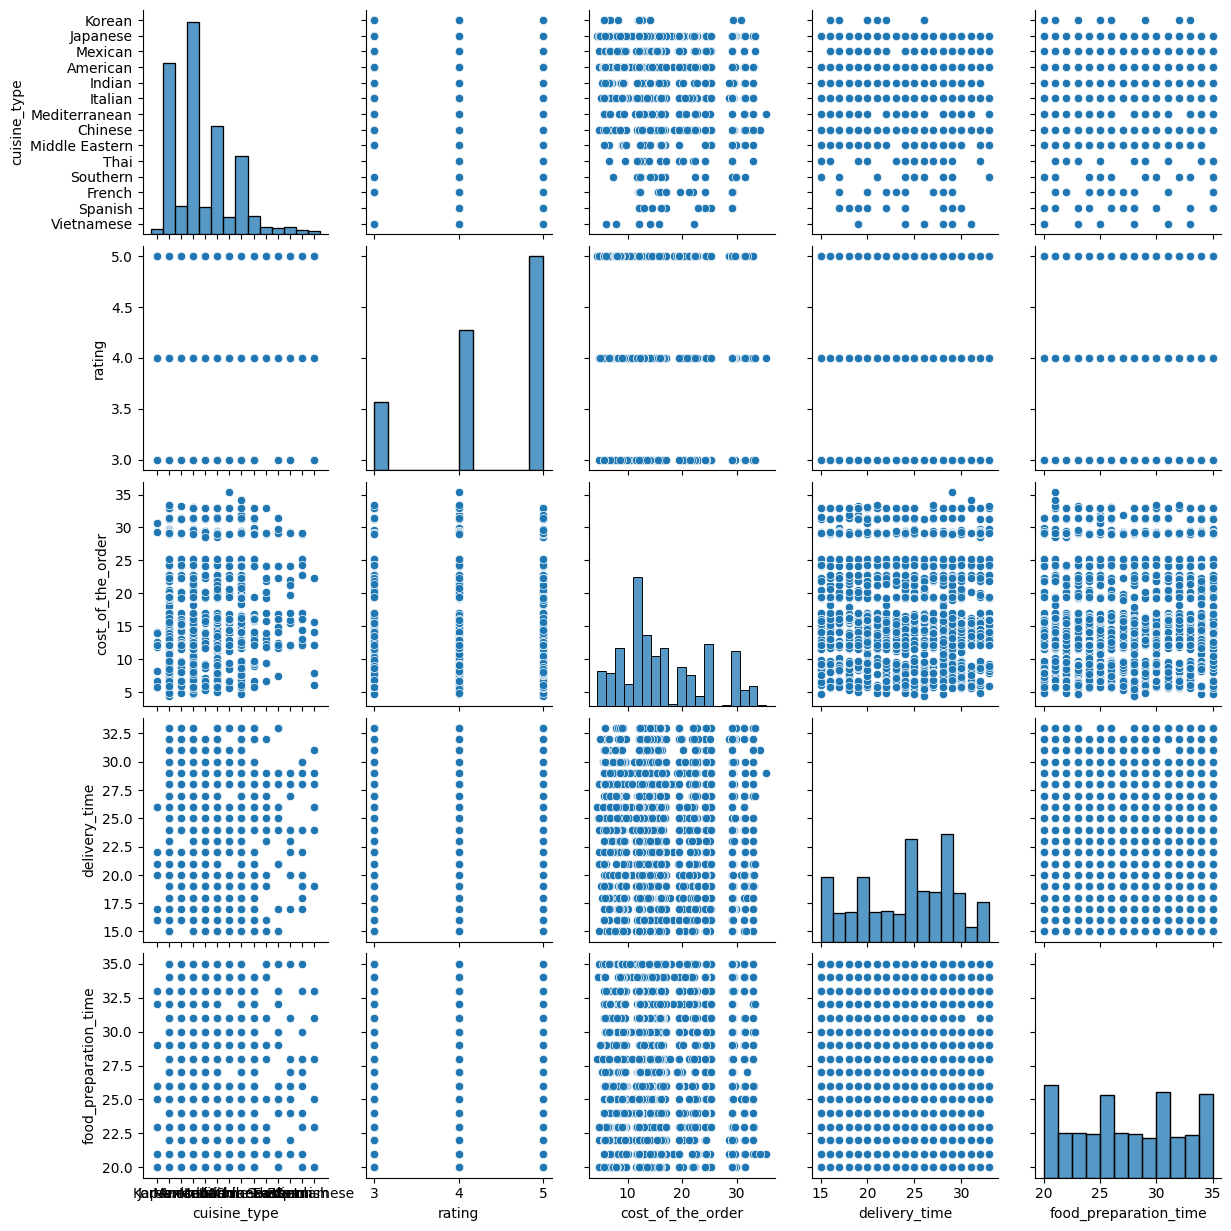

In [ ]:
sns.pairplot(df, vars =['cuisine_type', 'rating','cost_of_the_order', 'delivery_time','food_preparation_time' ])


<ipython-input-15-c0c7406231a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

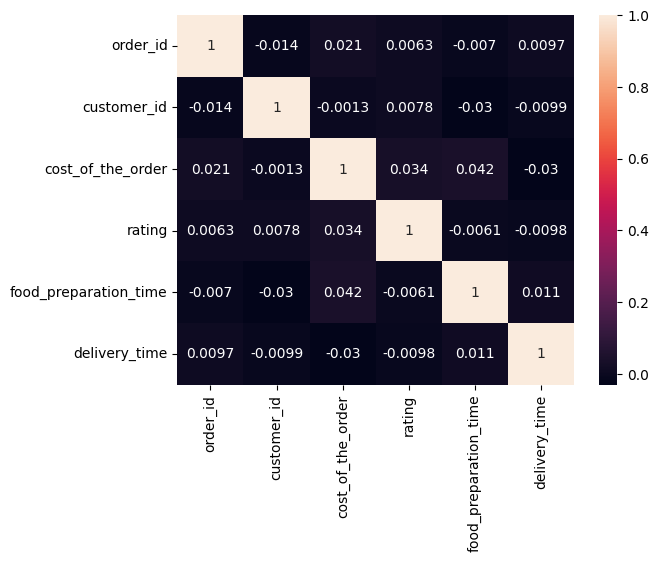

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['mean', 'count'])
# .agg is used to apply two functions to ratings column for each group
#  Restaurant_ratings is another dataframe that has the result of functions applied above
Winning_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
#  Winning_restaurants is the dataframe that meets the conditions
print(Winning_restaurants)


                               mean  count
restaurant_name                           
Blue Ribbon Fried Chicken  4.328125     64
Blue Ribbon Sushi          4.219178     73
Shake Shack                4.278195    133
The Meatball Shop          4.511905     84


#### Observations:
We have a list of 5 restaurants that meet the criteria with **The Meatball** having the best reviews and **Shack shack** have the most rating reviews

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
def revenue_formula(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return 0
df['revenue'] = df['cost_of_the_order'].apply(revenue_formula)
total_revenue = df['revenue'].sum()
print(f"the total revenue is : ${total_revenue}")

the total revenue is : $6166.303


#### Observations:
The company generates a whopping $6166 profit from the commission


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df['Total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes

orders_over_60 = (df['Total_time'] > 60).sum()

#Calculate the total number of orders

total_orders = df['Total_time'].count()

percentage_over_60 = (orders_over_60 / total_orders) * 100

print(f"{percentage_over_60}% of restaurants take more than 60 minutes")

10.537407797681771% of restaurants take more than 60 minutes


#### Observations:

**10.54%** of restaurants are taking more than 60 minutes for food to be delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


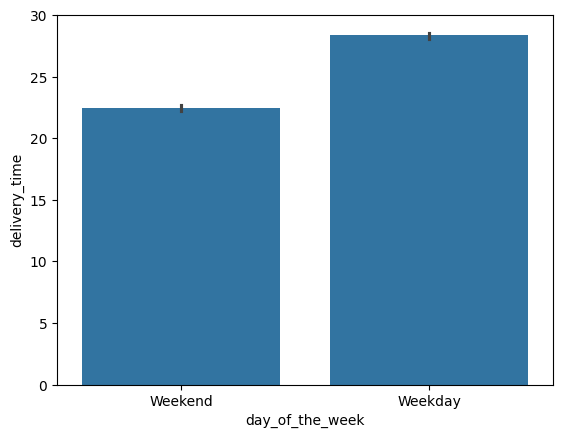

In [ ]:
sns.barplot(x='day_of_the_week', y='delivery_time', data=df)

# we can also use the coding approach

Mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()
print(Mean_delivery_times)

#### Observations:
The mean delivery time increases on weekday , could be because of traffic congestion or less people available to fullfill the delivery orders compared to weekends where people will work partime

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

<ipython-input-29-d455ff6dc7fc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = df , x = 'cuisine_type' , y = 'rating', hue = 'day_of_the_week', ci = False)


Text(0.5, 1.0, 'Line PLot :Ratings for Cuisine types')

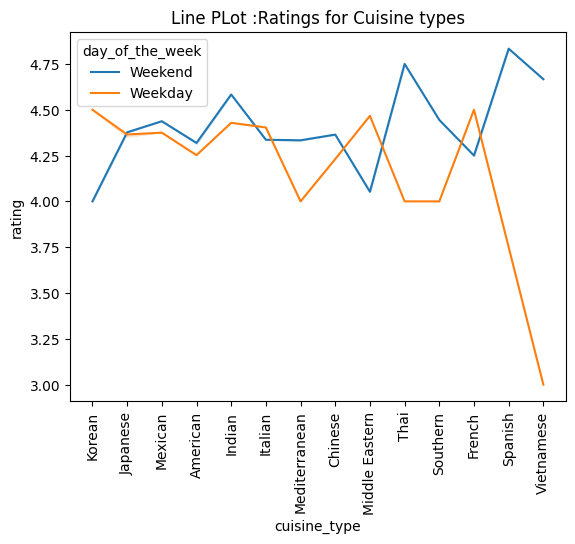

In [ ]:
sns.lineplot(data = df , x = 'cuisine_type' , y = 'rating', hue = 'day_of_the_week', ci = False)
plt.xticks(rotation=90)
plt.title('Line PLot :Ratings for Cuisine types')

### Conclusions:
  

1.   Spanish, Thai and Indian food is popular on weekends, quite possibly because customer likes to try new cuisines.
2.   Vietnamese and Mediterranean food rating drops very significantly on weekdays.
3. Mexican and American takeaways follow the same trend on weekdays and weekends.
4. By nature of cuisine , During weekdays grapgh suggest that people choose to prefer healthier meal options



### Recommendations:

1.   We can charge more commission from Spanish, Thai and Indian takeaways on weekends but charge them less commission on weekends.
2.   We can support Vietnamese and Mediterranean takeways in improving their food quality control and if they increase their rating we can launch promotional codes for these cuisines.
3. We can introduce promotional codes for American and Mexican takeaways , because it has a consistent decline of food rating.
4. Analyzing customer feedback for fluctuating ratings can provide some crucial insights
5. We can capitalize on people choosing healthier meal options on weekdays


*  

---